# Spielwiese

Wir laden die Daten.

Wählen Items aus.

Und säubern (z.B. missing values).

Und machen Darstellungen

### Bibliotheken, die wir brauchen:

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tqdm

### Select country

In [5]:
country = 'germany'

### Load original data

In [6]:
datapath = '../../data/'
filename = f'all_countries_numerical_'+country
ext = '.csv'

allcols=['recordno','endtime','qweek','i1_health','i2_health','i7a_health','i3_health','i4_health','i5_health_1','i5_health_2','i5_health_3','i5_health_4','i5_health_5','i5_health_99','i5a_health','i6_health','i7b_health','i8_health','i9_health','i10_health','i11_health','i12_health_1','i12_health_2','i12_health_3','i12_health_4','i12_health_5','i12_health_6','i12_health_7','i12_health_8','i12_health_9','i12_health_10','i12_health_11','i12_health_12','i12_health_13','i12_health_14','i12_health_15','i12_health_16','i12_health_17','i12_health_18','i12_health_19','i12_health_20','i13_health','i14_health_1','i14_health_2','i14_health_3','i14_health_4','i14_health_5','i14_health_6','i14_health_7','i14_health_8','i14_health_9','i14_health_10','i14_health_96','i14_health_98','i14_health_99','i14_health_other','d1_health_1','d1_health_2','d1_health_3','d1_health_4','d1_health_5','d1_health_6','d1_health_7','d1_health_8','d1_health_9','d1_health_10','d1_health_11','d1_health_12','d1_health_13','d1_health_98','d1_health_99','weight','age','gender','state','household_size','employment_status','wcrex2','wcrv_4','core_b2_4','cantril_ladder','phq4_1','phq4_2','phq4_3','phq4_4','m1_1','m1_2','m1_3','m1_4','m2','m3','m4_1','m4_2','m4_3','m4_4','m4_96','m4_99','m4_other','m5_1','m5_2','m6_1','m6_2','m6_3','m6_4','m6_5','m6_6','m6_7','m6_8','m6_96','m6_other','m7_1','m7_2','m7_3','m7_4','m7_5','m7_6','m7_8','m7_9','m7_10','m7_11','m8_1','m8_2','m8_3','m8_4','m8_5','m8_6','m8_7','m8_8','m8_96','m8_99','m8_other','m9_1','m9_2','m9_3','m9_4','m9_5','m9_6','m9_7','m10','m11','m12_1','m12_2','m12_3','m12_4','m12_5','m12_6','m12_7','m12_8','m12_96','m12_99','m12_other','m13_1','m13_2','m13_3','m13_4','m13_5','m13_6','m13_8','m13_9','m13_10','m13_11','v1','v2_1','v2_2','v2_3','v2_4','v2_5','v2_99','v3','v3_open','v4_1','v4_2','v4_3','v4_4','v4_5','v4_96','v4_99','v3_other','wcrex1','i12_health_21','i12_health_22','i12_health_23','i12_health_24','i12_health_25','r1_1','r1_2','r1_3','r1_4','r1_5','r1_6','r1_7','m7_other','m14_1','m14_2','m14_3','m14_4','m14_5','m14_6','m14_7','m14_8','m14_9','m14_10','m14_11','m14_96','m14_99','m14_open','i14_health_11','ct1_1','ct1_2','ct1b_1','ct1b_2','ct1b_3','ct1b_4','ct1b_5','ct1b_6','ct1b_7','ct1b_8','ct1b_9','ct1b_10','ct1b_11','ct1b_96','ct1b_99','ct1b_other','ct2','ct3','ct3_other','ct4','ct5_1','ct5_2','ct5_3','ct5_4','ct5_5','ct5_6','ct5_7','ct5_8','ct5_96','ct5_99','ct5_other','ct6_1','ct6_2','ct6_3','ct6_4','ct6_5','ct6_6','ct6_96','ct6_99','ct6_other','ct7_1','ct7_2','ct7_3','ct8_1','ct8_2','ct8_3','ct8_4','ct8_5','ct8_6','ct8_99','i12_health_26','ox1_1','ox1_2','ox3_1','ox3_2','ox3_3','ox3_4','ox3_5','ox3_6','ox5_1','ox5_2','ox6','ox4_1_1','ox4_2_1','ox4_3_1','ox4_4_1','ox4_5_1','ox4_6_1','ox4_7_1','ox4_8_1','ox4_9_1','ox4_10_1','ox4_11_1','w1','w2','w3','w4_1','w4_2','w4_3','w4_4','w4_5','w4_6','w4_7','w4_8','w4_9','w4_10','w4_11','w4_99','w4b','w5_1','w5_2','w5_3','w5_4','w5_5','w5_6','w5_7','w5_8','w5_9','w5_10','w5_11','w5_12','w5_13','w5_14','w5_15','w5_16','w5_96','w5_99','w6','w7','w9_1','w9_2','w9_3','w9_4','w9_5','disability','work1','work2','work3','work4','work5','work6','work7_1','work7_2','work7_3','work7_4','work7_5','work8','i12_health_27','i12_health_28','i12_health_29','soc1_1','soc1_2','soc1_3','soc2_1','soc2_2','soc2_3','soc2_4','soc2_5','soc2_6','soc2_open','vac_1','vac_2','vac2_1','vac2_2','vac2_3','vac2_4','vac2_5','vac2_6','vac_3','vac3_1','vac3_2','vac3_3','vac3_4','vac3_5','vac3_6','vac3_7','vac3_8','vac3_9','vac3_other','vac4','vac5','vac6','vac7','vac8','av1_1','av1_2','av1_3','av1_99','av2','r1_8','r1_9','r1_10','vac2_7','av3','vac','vac9','vac10_1','vac10_2','vac10_3','vac10_4','vac10_5','vac10_99','vac11','travel1_1','travel1_2','travel1_3','travel1_4','travel1_99','vac12_1','vac12_2','vac12_3','vac12_4','vac12_11','vac12_5','vac12_6','vac12_7','vac12_8','vac12_9','vac12_10','vac12_96','vac12_other','vac13','vac10_8','vac_booster','vac12_12','vac12_13','vac14_1','vac14_2','vac14_3','child_age_1','child_age_2','child_age_3','child_age_4','child_age_5','child_education_1','child_education_2','child_education_3','child_education_4','childvac','combi_vac','household_children','vent_1','vent_2','vent_3','wah_1','wah_2','wah_3','wah4','wah5','wah7_1','wah7_2','wah7_3','wah7_4','wah7_5','wah7_6','wah7_7','wah7_99','wah6','v1_1','v1_2','v1_3','v1_98','v3_me','v3_me_other','v3_baby','v3_baby_other','v3_child2_4','v3_child2_4_other','v3_child5_17','v3_child5_17_other','v3_adult18','v3_adult18_other','v4_8','v4_9','v4_6','v4_98','v4_other','sc_1_1','sc_1_2','sc_1_3','sc_1_4','sc_1_5','sc_1_6','sc_1_7','sc_1_99','sc_2','sc_3_1','sc_3_2','sc_3_3','sc_3_4','sc_3_5','sc_3_6','sc_3_7','sc_3_99','vac_boost_1','vac_boost_2','vac12_booster_1','vac12_booster_2','vac12_booster_3','vac12_booster_4','vac12_booster_5','vac12_booster_6','vac12_booster_7','vac12_booster_8','vac12_booster_9','vac12_booster_10','vac12_booster_96','vac12_booster_other','vac_man_1','vac_man_2','vac_man_3','vac_man_4','vac_man_5','vac_man_6','vac_man_7','vac_man_96','vac_man_99','q_other','household_children_resp','had_covid','vac_boost_beyond','future_1','future_2','had_covid_2','long_covid','future_3','country','case_id','region','employment_status_1','employment_status_2','employment_status_3','employment_status_4','employment_status_5','employment_status_6','employment_status_7','profile_work_stat','i5_health_98','ct5_9','disability_eu','w4_98','w5_98','record','house_rooms','sw_1_1','sw_1_2','sw_1_3','sw_1_4','sw_1_5','sw_1_6','sw_1_7','sw_1_8','sw_1_9','sw_1_10','sw_1_11','sw_1_12','sw_1_13','sw_1_14','sw_1_15','sw_1_98','sw_1_other','sw_2','s1_1','s1_2','s1_3','s1_4','s1_5','s1_6','s1_7','s1_8','s1_9','s1_10','s1_11','s1_12','s1_13','s1_14','s1_17','s1_15','s1_16','inputstate','profile_household_children','city','region_fi','house1','house2','q3_1','q3_2','q3_3','q3_4','i12_health_21_ph','i12_health_22_ph','i12_health_23_ph']

dfo = pd.read_csv(datapath+filename+ext, usecols=allcols)

print('Original data loaded. It is of size:',dfo.shape)

dfo['endtime']=pd.to_datetime(dfo['endtime'],dayfirst=True)
print(np.max(dfo['endtime']))

print('Adjust times done.\n')

print('Cell Completed!\n')

/usr/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (76,428,451,453,455,457,459,464,495,505) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Original data loaded. It is of size: (54505, 579)
2022-03-29 10:16:00
Adjust times done.

Cell Completed!



### Select desired response rates

In [7]:
# Set desired response rates
coverage_min = 0.0
coverage_max = 100.0 

### Construct data selection and get codebook information

In [8]:
# This is the dataframe we will use
df = dfo.copy()

datapath = '../../data/'
filename = 'codebook_sb'
ext = '.xlsx'

df_codebook = pd.read_excel(datapath+filename+ext)

item_dict = {}

idx = df_codebook.index[df_codebook['col3'] == 'Value'].tolist()
for ix in idx:
    if df_codebook.iloc[ix-1,0].lower() in allcols:
        item_dict.update( { df_codebook.iloc[ix-1,0].lower() : df_codebook.iloc[ix+1,2] } )
        
print('Get code book information done.\n')


print('Remove items based on coverage ...') 
item_coverage_dict = {}

for col in df:
    nans = df[col].isna()
    coverage = 100 - 100*nans.mean()
    #print(col,' : ',percentage,'%')
    item_coverage_dict.update({ col:coverage})
    
print('- compute coverage done.')    

deleted_cols = []

#print('Will be deleted:')
for col in df:
    if df[col].dtype == 'float64':
        coverage = item_coverage_dict[col]
        if (coverage < coverage_min and coverage > coverage_max):
            df = df.drop(columns=[col])
            deleted_cols.append(col)
            #print(col)

print('- removal done.')            
print('- items with coverage between',coverage_min,'% and',coverage_max,'% will be removed.\n\n')

print('Remove non-numerical items ...')
keep = ['endtime','gender','employment_status','state','disability','household_children','household_size', 'country' ]
for col in df:
    if df[col].dtype == 'object':
        if col not in keep:
            #print(col)
            df = df.drop(columns=[col])
            deleted_cols.append(col)

remaining_cols = list(df.columns)

print('\nCell Completed!\n')
print('The remaining data is of size:',df.shape)

Get code book information done.

Remove items based on coverage ...
- compute coverage done.
- removal done.
- items with coverage between 0.0 % and 100.0 % will be removed.


Remove non-numerical items ...

Cell Completed!

The remaining data is of size: (54505, 554)


## Functions for Plotting & Data Processsing

In [50]:
def myerrorplot(item):
    fig,axs = plt.subplots(nrows=1, ncols=2,gridspec_kw={'width_ratios': [5, 1]},figsize=(16, 3))
    fig.suptitle(item_dict[item], fontsize=16)

    # This works:
    # df.groupby(df["endtime"].dt.to_period("M"))[item].mean().plot(kind='bar',ax=axs[0])

    # But here with error bars
    qual = df.groupby(df["endtime"].dt.to_period("M"))[item].agg([np.mean, np.std])
    qual.plot(kind = "bar", y = "mean", legend = False, yerr = "std", color='green',ax=axs[0])
    df[item].hist(orientation="horizontal",color='green',ax=axs[1])
    
def mybarplot(item):
    fig,axs = plt.subplots(nrows=1, ncols=2,gridspec_kw={'width_ratios': [5, 1]},figsize=(16, 3))
    fig.suptitle(item_dict[item], fontsize=16)

    df.groupby(df["endtime"].dt.to_period("M"))[item].mean().plot(kind='bar',ax=axs[0],color="green")
    df[item].hist(orientation="horizontal",ax=axs[1],color="green")
    
def myhistplot(item): 
    fig,ax = plt.subplots(nrows=1, ncols=1,figsize=(8, 3))
    fig.suptitle(item_dict[item], fontsize=16)
    df[item].hist(orientation="vertical",ax=ax)
    
def plot_correlation(frame, corr_items="all"):
    if corr_items == "all":
        new_df = frame.copy()
    else:
        new_df = frame[corr_items].copy()
    new_df.dropna(axis=0)
    f = plt.figure(figsize=(16, 10))
    plt.matshow(new_df.corr(), fignum=f.number)
    if corr_items == "all":
        plt.yticks(np.arange( len(new_df.columns)-2 ))
    else:
        plt.yticks(np.arange( len(corr_items) ))
    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=14)
    plt.title('Correlation Matrix', fontsize=16)
    k=0
    if corr_items == "all":
        for i in new_df.columns:
            print(str(k)+":"+i,end="    ",)
            k+=1
    else:
        for i in corr_items:
            print(str(k)+":"+i,end="    ",)
            k+=1
    
def boxplot(item):
    new_df = df[[item,"endtime"]].copy()
    #df2.mul(-1).add(6)
    #df2["avg"] = df2.mean(axis=1)
    new_df["endtime"] = df["endtime"].dt.to_period("M")
    fig,axs = plt.subplots(nrows=1, ncols=2,gridspec_kw={'width_ratios': [5, 1]},figsize=(16, 3))

    #print(type(new_df))
    new_df.boxplot(item, by="endtime", rot=70, ax=axs[0])
    df2["avg"].hist(orientation="horizontal",color='green', ax=axs[1])
    axs[0].set_title("")
    fig.suptitle(item, fontsize=16)
    
def aggregate_cols(frame,col_list):    
    #df["new_avg"] = aggregate_cols(df,["i12_health_1","i12_health_2"])
    new_df = frame[col_list].copy()
    new_df["avg"] = new_df.mean(axis=1)
    return new_df["avg"]

In [10]:
def filter_dataframe(frame,cat,values,match = "between"):
    #match:
    #between -> von bis
    #exact -> genauer match
    
    if match == "between":
        new_df = frame[frame[cat] < values[1]].copy()
        new_df = new_df[new_df[cat] > values[0]].copy()
        return new_df
    elif match == "exact":
        new_df = frame.copy()
        new_df = new_df[frame[cat] == values[0]].copy()
    
    return "error"

def fd(frame,cat,values,match = "between"):
    return filter_dataframe(frame,cat,values,match = "between")
#a = filter_dataframe(df,["age"],25)
#a = filter_dataframe(df,["age"],[35,49])
#print(a.head())

### Let's create our own dataframe with our variables

In [48]:
df2 = pd.DataFrame()
df2["endtime"] = df["endtime"].dt.to_period("M")
add_items = ["cantril_ladder","age","household_size","had_covid","had_covid_2","work2","r1_7"]
add_items.extend([ i for i in item_dict.keys() if 'i12_health' in i])
for i in add_items:
    df2[i] = df[i]
df2["i12_agg"] = aggregate_cols(df,[ i for i in item_dict.keys() if 'i12_health' in i])

print(df2.head())
df2_firstwave = df[df["endtime"] < "2020-05"]
print(df2_firstwave.info())

  endtime  cantril_ladder   age household_size  had_covid  had_covid_2  work2  \
0 2020-04             NaN  18.0              3        NaN          NaN    NaN   
1 2020-04             NaN  63.0              2        NaN          NaN    NaN   
2 2020-04             NaN  20.0              3        NaN          NaN    NaN   
3 2020-04             NaN  25.0              3        NaN          NaN    NaN   
4 2020-04             NaN  50.0              3        NaN          NaN    NaN   

   r1_7  i12_health_1  i12_health_2    ...     i12_health_21  i12_health_22  \
0   NaN           5.0           5.0    ...               NaN            NaN   
1   NaN           5.0           1.0    ...               NaN            NaN   
2   NaN           1.0           1.0    ...               NaN            NaN   
3   NaN           3.0           3.0    ...               NaN            NaN   
4   NaN           1.0           1.0    ...               NaN            NaN   

   i12_health_23  i12_health_24  i12_h

# At this point we are ready to start!

### Example: Behavioral Variables

Text(0.5,0.98,'average i12_health (flipped y-axis)')

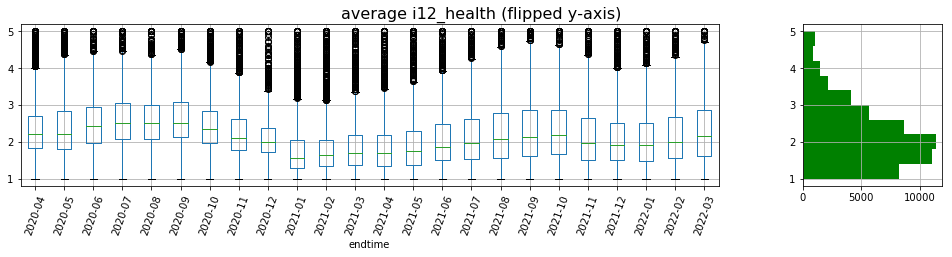

In [47]:
items_behavior = [ i for i in item_dict.keys() if 'i12_health' in i]
#items_behavior.extend(["endtime"])
df_i12 = df[items_behavior].copy()
df_i12.mul(-1).add(6)
df_i12["avg"] = df_i12.mean(axis=1)
df_i12["endtime"] = df["endtime"].dt.to_period("M")

fig,axs = plt.subplots(nrows=1, ncols=2,gridspec_kw={'width_ratios': [5, 1]},figsize=(16, 3))

#qual = df2.groupby(df2["endtime"].dt.to_period("M"))["avg"].agg([np.mean, np.std])
#qual.plot(kind = "bar", y = "mean", legend = False, color='green',ax=axs[0])
df_i12.boxplot("avg", by="endtime", rot=70, ax=axs[0])
df_i12["avg"].hist(orientation="horizontal",color='green', ax=axs[1])
axs[0].set_title("")
fig.suptitle("average i12_health (flipped y-axis)", fontsize=16)

Correlation != Causation:
Wer nicht covid hatte, beurteilt vielleicht seine adherence falsch.

Adherence to measures könnte gerade am Anfang, oder für bestimmte Gruppen sehr nützlich sein.

Funktion: filter_dataframe

Funktion: aggregate_values  -> mittelwert von spalten

es gibt eine Frage: positiver Test letzte 7 Tage

was mich noch interessieren würde: einfluss von angst und percieved risk auf vacc decision
-> r1_2 (m14_3, m14_4)

r1_5: wearing a mask is not possible for me
work4: To what extent do you think it is likely is it that you will lose your job over the next 6 months?

r1_7: my life has been greatly affected by coronavirus
had_covid2
i14_health


für morgen:
ich schreibe eine Funktion, die die Korrelationsmatrix für alles aus einem dataframe plottet. (auch filtern nach alter, endtime, Household size ...)
Wir schauen uns Paper an, die uns vielleicht hints geben, wonach wir suchen sollten.
Wenn wir irgendwas finden, was uns überrascht, da stürzen wir uns drauf

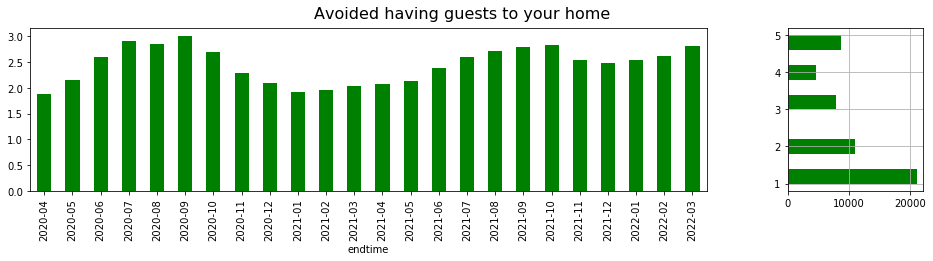

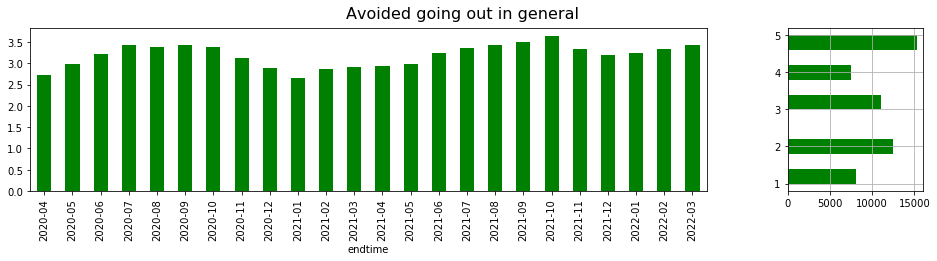

In [13]:
mybarplot("i12_health_11")
mybarplot("i12_health_6")

0:i12_agg    1:work2    2:r1_7    3:cantril_ladder    

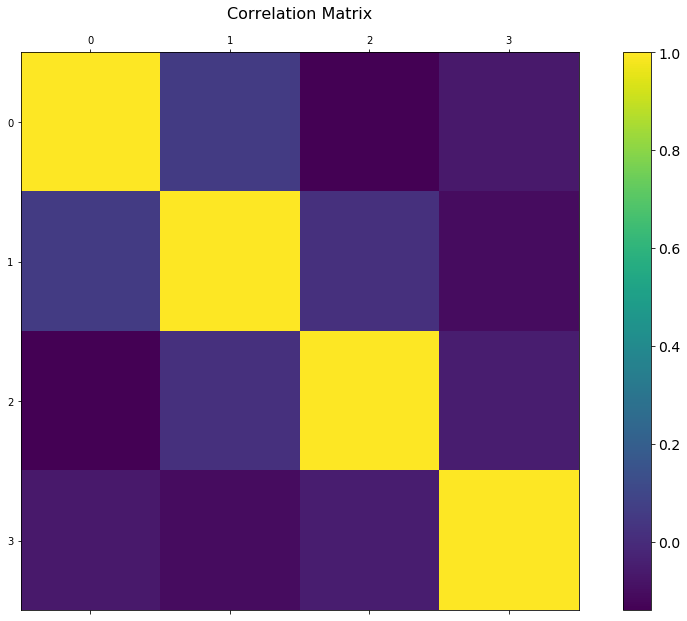

In [51]:
plot_correlation(df2,["i12_agg","work2","r1_7","cantril_ladder"])

0:endtime    1:cantril_ladder    2:age    3:household_size    4:had_covid    5:had_covid_2    6:work2    7:r1_7    8:i12_health_1    9:i12_health_2    10:i12_health_3    11:i12_health_4    12:i12_health_5    13:i12_health_6    14:i12_health_7    15:i12_health_8    16:i12_health_9    17:i12_health_10    18:i12_health_11    19:i12_health_12    20:i12_health_13    21:i12_health_14    22:i12_health_15    23:i12_health_16    24:i12_health_17    25:i12_health_18    26:i12_health_19    27:i12_health_20    28:i12_health_21    29:i12_health_22    30:i12_health_23    31:i12_health_24    32:i12_health_25    33:i12_health_26    34:i12_health_27    35:i12_health_28    36:i12_health_29    37:i12_agg    

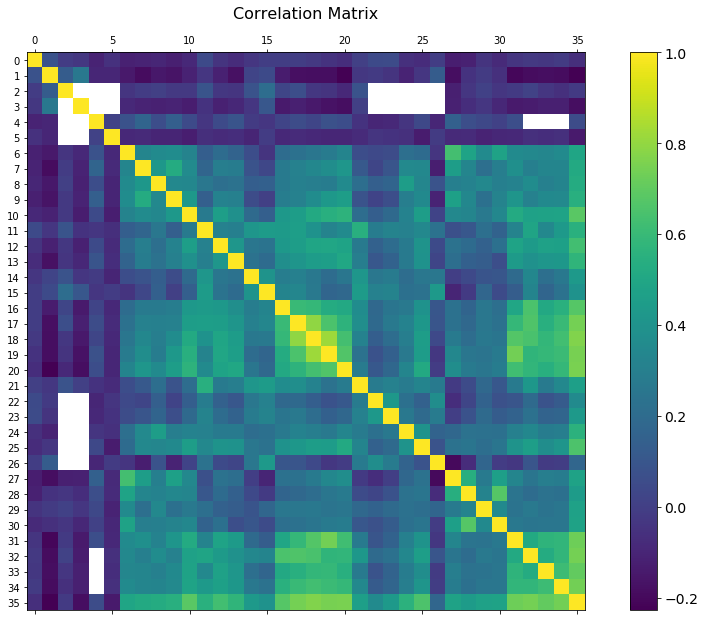

In [52]:
plot_correlation(df2)